In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nlp
import re

import warnings
warnings.filterwarnings('ignore')

In [33]:
tweet=pd.read_csv('Tweets - Tweets.csv')
tweet.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweet.shape

(14640, 9)

In [6]:
tweet.isnull().mean()*100 # percentage of null values

tweet_id           0.000000
airline            0.000000
name               0.000000
retweet_count      0.000000
text               0.000000
tweet_coord       93.039617
tweet_created      0.000000
tweet_location    32.329235
user_timezone     32.923497
dtype: float64

In [34]:
# we drop the tweet_coord because it has 93% null values we can fill this
tweet.drop('tweet_coord',axis=1,inplace=True)

### 1) most of the tweets are on united airline it is popular but can't say it is positive or negative

### 2) lowest tweets on virgin america means niether good or bad impression


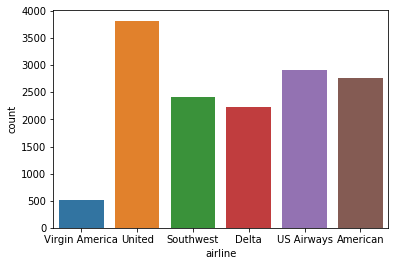

In [5]:
sns.countplot(tweet['airline']) # most of the tweets are on united airline and lowest on virgin america

### Top 10 time zone where the tweets are twitted

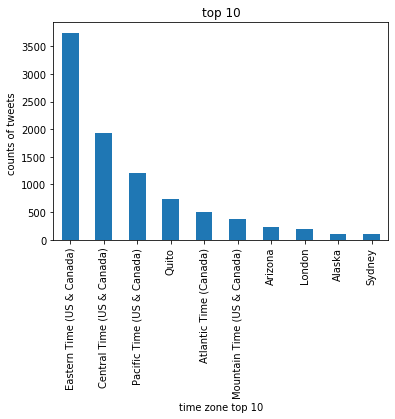

In [25]:
tweet['user_timezone'].value_counts().head(10).plot(kind='bar')
plt.xlabel('time zone top 10')
plt.ylabel('counts of tweets ')
plt.title('top 10')
plt.show()

###  1) Time zone wise name of airline,  I am trying to find which airline got maximum and minimum tweets from which timezone so we make crosstab

In [44]:
airline_time=pd.crosstab(tweet['airline'],tweet['user_timezone'],).T
airline_time.head()

airline,American,Delta,Southwest,US Airways,United,Virgin America
user_timezone,,,,,,
Abu Dhabi,0,1,5,10,5,2
Adelaide,0,0,0,7,0,0
Alaska,31,7,30,10,26,4
America/Atikokan,0,1,0,0,0,0
America/Boise,3,0,0,0,0,0


### American airlines got maximum tweets from eastern time us and canada and no tweets coming from other time zones

In [63]:
airline_time[airline_time['American']==airline_time['American'].max()]

airline,American,Delta,Southwest,US Airways,United,Virgin America
user_timezone,,,,,,
Eastern Time (US & Canada),535,835,477,898,886,113


### Delta airlines got maximum tweets from eastern time us and canada and no tweets coming from other time zones

In [66]:
airline_time[airline_time['Delta']==airline_time['Delta'].max()]

airline,American,Delta,Southwest,US Airways,United,Virgin America
user_timezone,,,,,,
Eastern Time (US & Canada),535,835,477,898,886,113


### Southwest airlines got maximum tweets from Central time us and canada and no tweets coming from other time zones

In [55]:
airline_time[airline_time['Southwest']==airline_time['Southwest'].max()]

airline,American,Delta,Southwest,US Airways,United,Virgin America
user_timezone,,,,,,
Central Time (US & Canada),484,129,497,274,494,53


### US Airways airlines got maximum tweets from Eastern time us and canada and no tweets coming from other time zones

In [56]:
airline_time[airline_time['US Airways']==airline_time['US Airways'].max()]

airline,American,Delta,Southwest,US Airways,United,Virgin America
user_timezone,,,,,,
Eastern Time (US & Canada),535,835,477,898,886,113


### Virgin America airlines got maximum tweets from Pacific time us and canada and no tweets coming from other time zones

In [58]:
airline_time[airline_time['Virgin America']==airline_time['Virgin America'].max()]

airline,American,Delta,Southwest,US Airways,United,Virgin America
user_timezone,,,,,,
Pacific Time (US & Canada),204,161,224,103,390,126


### Cleaning

In [35]:
tweet.head()

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Before cleaning count of words appear

#### TextBlob is a library that mange textual data. It provides a simple API for diving into common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [36]:
!pip install textblob
import nltk
nltk.download('brown')

from textblob import TextBlob
wordlist = pd.DataFrame()
for t in tweet.text:
    tx = TextBlob(t)
    l = list(tx.noun_phrases)
    if len(l)!=0:
        wordlist = wordlist.append(l,ignore_index=True)
allword = wordlist.groupby(0).size()
allword

[nltk_data] Downloading package brown to C:\Users\Ajay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


0
# $ 10voucherwhatajoke                          1
# 's                                            1
# .800 #                                        2
# 12thman http                                  1
# 1k # flt803 # nonupgrade                      1
# 1sttimeflyer                                  1
# 24h                                           1
# 29daystogo                                    1
# 2dayslate flight                              1
# 2daysofunitedfailures # 1thingafteranother    1
# 2hourwaitsucks                                1
# 30timesenough                                 1
# 31daysofoscar                                 1
# 3hourdelay                                    1
# 3hrdelay #                                    1
# 3hrs                                          1
# 3thparty                                      1
# 3thparty #                                    1
# 3ticketsforjax                                1
# 45minflight # been3hours                      

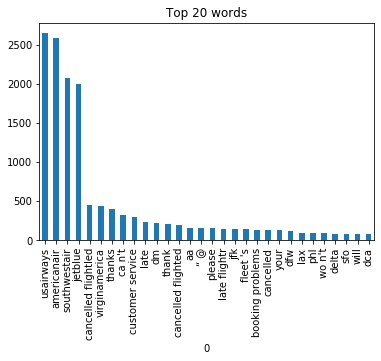

In [39]:
top30allword = allword.sort_values(0,ascending=False).head(30)
top30allword.plot(kind='bar',title='Top 30 words')
plt.show()

## In the following, the tweets are removed from unnecessary characters, converted to lowercase letters, separated into words and their roots are obtained.

In [40]:
import nltk
nltk.download('wordnet')
lemma = nlp.WordNetLemmatizer()
def preprocess(x):
    x = str(x)
    x = re.sub("[^a-zA-z]", " ",x)
    x = x.lower()
    x = nlp.word_tokenize(x)
    #x = [i for i in x if not i in set(stopwords.words("english"))] #slowly
    x = [lemma.lemmatize(i) for  i in x]
    x = " ".join(x)
    return x

tweet.text = tweet.text.apply(preprocess)
tweet.text[0:10]

[nltk_data] Downloading package wordnet to C:\Users\Ajay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                     virginamerica what dhepburn said
1    virginamerica plus you ve added commercial to ...
2    virginamerica i didn t today must mean i need ...
3    virginamerica it s really aggressive to blast ...
4    virginamerica and it s a really big bad thing ...
5    virginamerica seriously would pay a flight for...
6    virginamerica yes nearly every time i fly vx t...
7    virginamerica really missed a prime opportunit...
8           virginamerica well i didn t but now i do d
9    virginamerica it wa amazing and arrived an hou...
Name: text, dtype: object

reference : https://programminghistorian.org/en/lessons/sentiment-analysis

The ‘VADER Sentiment Analysis’ tool (generates positive, negative, and neutral sentiment scores for a given input)VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment intensity tool added to NLTK in 2014. Unlike other techniques that require training on related text before use, VADER is ready to go for analysis without any special setup

The ‘word_tokenize’ tokenizer tool (splits a large text into a sequence of smaller units, like sentences or words)

In [41]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ajay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ajay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [43]:
sid = SentimentIntensityAnalyzer()

### VADER also sums all weighted scores to calculate a “compound” value normalized between -1 and 1; this value attempts to describe the overall affect of the entire text from strongly negative (-1) to strongly positive (1).

In [44]:
""" Example of calculating the polarity of text """

message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: -0.3804, neg: 0.093, neu: 0.836, pos: 0.071, 

In [45]:
""" APPLYING ON TEXT COLUMN """

pol=[]
for i in tweet.text:
    polarity=sid.polarity_scores(i).get('compound')  # compound give overall polarity of the text or tweet
    pol.append(polarity)


In [46]:
Pol=pd.DataFrame(np.array(pol))

In [47]:
tweet['polarity']=Pol[0] #""" WE GOT THE POLARITY """

In [48]:
tweet.head()

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,polarity
0,5.703061e+17,Virgin America,cairdin,0,virginamerica what dhepburn said,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.0000
1,5.703011e+17,Virgin America,jnardino,0,virginamerica plus you ve added commercial to ...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.0000
2,5.703011e+17,Virgin America,yvonnalynn,0,virginamerica i didn t today must mean i need ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0.0000
3,5.703010e+17,Virgin America,jnardino,0,virginamerica it s really aggressive to blast ...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),-0.2716
4,5.703008e+17,Virgin America,jnardino,0,virginamerica and it s a really big bad thing ...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-0.5829


### Feature engineering 


In [49]:
## These feature are not important for analysing sentiment and also these has so many unique values that increase the complexity of the model
tweet.drop(columns=['tweet_id','name','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)

In [50]:
tweet.head()

,airline,retweet_count,text,polarity
0,Virgin America,0,virginamerica what dhepburn said,0.0000
1,Virgin America,0,virginamerica plus you ve added commercial to ...,0.0000
2,Virgin America,0,virginamerica i didn t today must mean i need ...,0.0000
3,Virgin America,0,virginamerica it s really aggressive to blast ...,-0.2716
4,Virgin America,0,virginamerica and it s a really big bad thing ...,-0.5829


### Distribution of polarity 

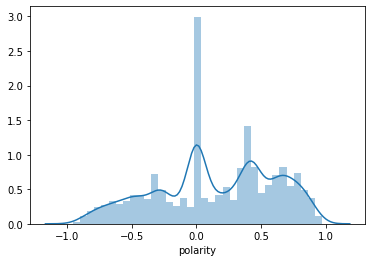

In [104]:
sns.distplot(tweet['polarity']) # distribution of polairy

##  Assumption 

### 1) assuming that polarity >0.25 is positive polarity

### 2) polarity <-0.25 is negative polarity

### 3) and range  -0.25 < polarity < 0.25 is neutral

### 0 for negative polarity , 1 for neutral polarity , 2 for positve polarity

In [51]:
def fun(x):
    if (x>=0.25):
        return (2)
    elif (x<=-0.25) :
        return (0)
    else:
        return (1)
tweet['polarity']=tweet['polarity'].apply(lambda x:fun(x))

In [52]:
tweet['polarity'].value_counts() # total counts of tweet are positve or negative

2    6666
1    4600
0    3374
Name: polarity, dtype: int64

In [53]:
tweet.head()

,airline,retweet_count,text,polarity
0,Virgin America,0,virginamerica what dhepburn said,1
1,Virgin America,0,virginamerica plus you ve added commercial to ...,1
2,Virgin America,0,virginamerica i didn t today must mean i need ...,1
3,Virgin America,0,virginamerica it s really aggressive to blast ...,0
4,Virgin America,0,virginamerica and it s a really big bad thing ...,0


In [54]:
!pip install textblob
import nltk
nltk.download('brown')

from textblob import TextBlob
wordlist = pd.DataFrame()
for t in tweet.text:
    tx = TextBlob(t)
    l = list(tx.noun_phrases)
    if len(l)!=0:
        wordlist = wordlist.append(l,ignore_index=True)
allword = wordlist.groupby(0).size()
allword

[nltk_data] Downloading package brown to C:\Users\Ajay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


0
[ sigh ]                                     1
^gj flight didn t                            1
^gj funny i                                  1
^gj i                                        2
^jp inconvience                              1
^sw i ve                                     1
_austrian i guess i                          1
_exact_ step                                 1
aa ^kp                                       1
aa abi dfw                                   1
aa account                                   1
aa agent                                     1
aa amp                                       2
aa amp phone s amp                           1
aa amp u airway                              1
aa award                                     1
aa awesome crew                              1
aa ba americanair british_airways            1
aa ba doesn t                                1
aa bc                                        1
aa com                                       1
aa credit p

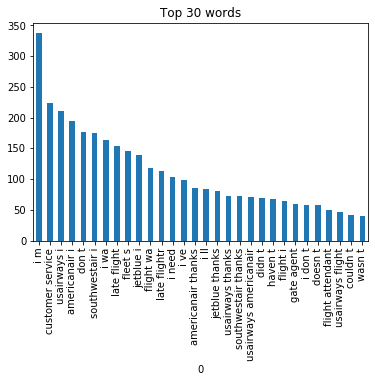

In [55]:
top30allword = allword.sort_values(0,ascending=False).head(30)
top30allword.plot(kind='bar',title='Top 30 words')
plt.show()

### Percentage of polarity of tweets of each airline

#### 1) united has 67% positive tweets and 44% positive tweets in virgin america 

### 2) american has 31% of negative tweets and us airways has 34% negative tweets

In [23]:
tweet.groupby('airline')['polarity'].value_counts(1)*100

airline         polarity
American        1           34.613991
                2           34.324030
                0           31.061979
Delta           2           41.944194
                1           37.353735
                0           20.702070
Southwest       2           44.173554
                1           33.884298
                0           21.942149
US Airways      1           34.363199
                0           34.122897
                2           31.513903
United          2           67.451596
                1           21.271586
                0           11.276818
Virgin America  2           44.047619
                1           35.912698
                0           20.039683
Name: polarity, dtype: float64

### number  of tweets with different airline with polarity 

In [112]:
pd.crosstab(tweet['airline'],tweet['polarity'])

polarity,0,1,2
airline,,,
American,857,955,947
Delta,460,830,932
Southwest,531,820,1069
US Airways,994,1001,918
United,431,813,2578
Virgin America,101,181,222


### one hot encoding of airlines  because it is important and we can't do label encoding because it is not ordinal


In [25]:
tweet_data=pd.get_dummies(columns=['airline'],data=tweet)

In [26]:
tweet_data.head()

,retweet_count,text,polarity,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,0,virginamerica what dhepburn said,1,0,0,0,0,0,1
1,0,virginamerica plus you ve added commercial to ...,1,0,0,0,0,0,1
2,0,virginamerica i didn t today must mean i need ...,1,0,0,0,0,0,1
3,0,virginamerica it s really aggressive to blast ...,0,0,0,0,0,0,1
4,0,virginamerica and it s a really big bad thing ...,0,0,0,0,0,0,1


In [129]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

### Most usable word in the tweets US airway,southwest air , flight, united american,customer serivice etc.

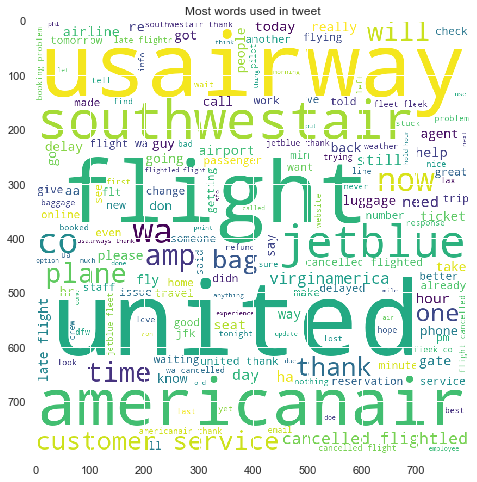

In [131]:
word = " ".join(tweet.text)
cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 12).generate(word) 
      
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(cloud)
plt.title("Most words used in tweet")
plt.show()

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = "english")
encoded_X = vectorizer.fit_transform(tweet.text).toarray()
print(encoded_X.shape)
print("Features First 100:",vectorizer.get_feature_names()[:100])

(14640, 12427)
Features First 100: ['__rwg__', '_austrian', '_defcon_', '_emmaclifford', '_exact_', '_justdippin_', '_lucy_may', '_robprice', '_wtvd', 'a_life_story_', 'aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aaron', 'aarp', 'aateam', 'aau', 'aavvoreph', 'aay', 'ab', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcletjetbluestreamfeed', 'abcnetwork', 'abcnews', 'abducted', 'abi', 'abigailedge', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abprg', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtwf', 'abundance', 'abuse', 'abused', 'abxrq', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'acces', 'access', 'accessibility', 'accessible', 'accessing', 'accident', 'accidentally', 'accomidating', 'accommodate', 'accommodated

In [122]:
tweet2 = tweet.copy()
del tweet2["text"]
tweet2 = pd.concat([pd.DataFrame(encoded_X),tweet2], axis=1)
tweet2.head()

,0,1,2,3,4,5,6,7,8,9,...,12420,12421,12422,12423,12424,12425,12426,airline,retweet_count,polarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Virgin America,0,0


In [123]:
X = tweet2.drop(["polarity"],axis=1)
y = tweet2.polarity

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=22)
print("Train :",X_train.shape)
print("Test  :",X_test.shape)

Train : (10980, 12429)
Test  : (3660, 12429)


In [ ]:
# distribution of polarity

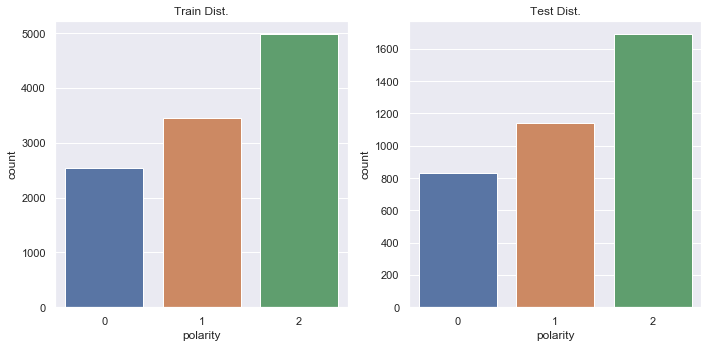

In [126]:
sns.set()
plt.subplots(figsize=(10,5),tight_layout=True)
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("Train Dist.")
plt.subplot(1,2,2)
sns.countplot(y_test)
plt.title("Test Dist.")
plt.show()